## Load the dataset

In [24]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.stem.porter import PorterStemmer

In [2]:
df = pd.read_csv('../data/form_questions.csv')

In [3]:
df.head()

,question
0,Are you there?
1,Firstname:
2,I get irritated easily.
3,Comments
4,Let's do a survey about exercising?


In [4]:
df.tail()

,question
4302,Do you have any dietary requirements?
4303,Do you think that it was a success?
4304,Address
4305,I have little to say.
4306,How often do you usually click on items that a...


All the content is in English, it contains punctuation and other characters that might not help in the topic analysis. Besides we need to have all in lowercase.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4307 entries, 0 to 4306
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  4306 non-null   object
dtypes: object(1)
memory usage: 33.8+ KB


In [6]:
df.question.isna().sum()

1

We have an intruder that we need to remove.

# Cleaning

In [7]:
df = df.dropna()

In [8]:
# keep only words and numbers
df['cleaned'] = df['question'].map(lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', x))

In [9]:
df['cleaned'] = df['cleaned'].map(lambda x: x.lower())

In [10]:
df.head()

,question,cleaned
0,Are you there?,are you there
1,Firstname:,firstname
2,I get irritated easily.,i get irritated easily
3,Comments,comments
4,Let's do a survey about exercising?,lets do a survey about exercising


# Exploratory Analysis

In [11]:
df['length'] = df['cleaned'].map(lambda x: len(x))

In [12]:
def tokenize(text):
    words = text.split()
    porter_stemmer=nltk.PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [13]:
def word_count(text):
    words = tokenize(text)
    return len(words)

In [14]:
df['wc'] = df['cleaned'].map(lambda x: word_count(x))

In [15]:
df.head()

,question,cleaned,length,wc
0,Are you there?,are you there,13,3
1,Firstname:,firstname,9,1
2,I get irritated easily.,i get irritated easily,22,4
3,Comments,comments,8,1
4,Let's do a survey about exercising?,lets do a survey about exercising,33,6


In [16]:
df.describe()

,length,wc
count,4306.000000,4306.000000
mean,40.880399,7.701811
std,31.479837,5.656220
min,2.000000,1.000000
25%,20.000000,4.000000
50%,34.000000,6.000000
75%,54.000000,10.000000
max,464.000000,87.000000


In [17]:
print("After cleaning")
print("Total number of characters in the dataset {}".format(sum(df.length)))
print("Total number of words in the dataset {}".format(sum(df.wc)))

After cleaning
Total number of characters in the dataset 176031
Total number of words in the dataset 33164


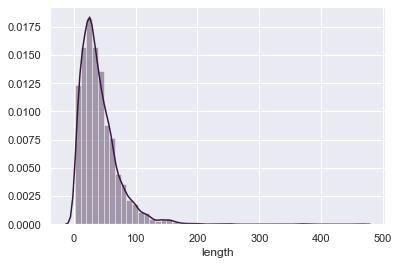

In [21]:
sns.set(style="darkgrid", palette="rocket")
sns.distplot(df.length)

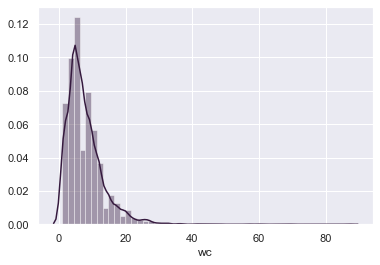

In [22]:
sns.distplot(df.wc)

## Wordcloud

In [18]:
corpus = ','.join(list(df['cleaned'].values))

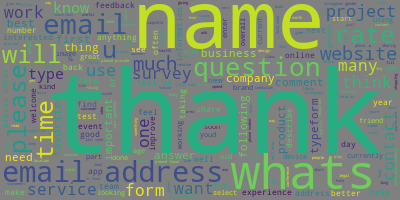

In [25]:
# stopwords=STOPWORDS is not needed, by default it is removing the stopworkds in English
wordcloud = WordCloud(background_color="grey", max_words=5000, contour_width=3, stopwords=STOPWORDS)
wordcloud.generate(corpus)
wordcloud.to_image()

# Conclusions
The total number of documents is not too big, only 4306 samples. After analyzing the most frequent words, we can identify some candidates to add to the stopwords, when removing them for the next analysis. For instance *please* and *thank*. Besides we need to remove "typeform".

In [20]:
df.to_pickle("../data/cleaned_df")